* # Douban movie reviews analysis


## 1.Pre-processing

We have added some steps about data preprocessing to make the data cleaner and better processed. We deleted the duplicated comments and made a moive stop-word list.

In [1]:
import numpy as np
import pandas as pd
import jieba
import re

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

from gensim.corpora import Dictionary

# Pre-Processing
import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer

# Modeling
import gensim
import statsmodels.api as sm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.util import ngrams
from collections import Counter
from gensim.models import word2vec
from nltk.tokenize import word_tokenize
from gensim import corpora, models, similarities
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split as split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression

# For the first-time user, you should download these two pre-trained tokenizer
#nltk.download('punkt') 
#nltk.download('stopwords')

import numpy as np
import pandas as pd

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn.metrics import r2_score

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
#nltk.download('wordnet')


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv("../yangqf/Desktop/DataSet/userbookcomment(2).csv")

In [3]:
data

id     userID                                readBookUrl  \
0              1  180363105  https://book.douban.com/subject/26728835/   
1              2  180363105  https://book.douban.com/subject/35458441/   
2              3  180363105  https://book.douban.com/subject/24536403/   
3              4  180363105  https://book.douban.com/subject/22714154/   
4              5  180363105   https://book.douban.com/subject/1925375/   
...          ...        ...                                        ...   
3880856  3881278     yoichi   https://book.douban.com/subject/6874566/   
3880857  3881279     yoichi  https://book.douban.com/subject/10555538/   
3880858  3881280     yoichi  https://book.douban.com/subject/10555489/   
3880859  3881281     yoichi   https://book.douban.com/subject/1059029/   
3880860  3881282     yoichi  https://book.douban.com/subject/10560798/   

                     bookName  \
0                        动物农场   
1                        洗牌年代   
2                       代码的未来   
3                          繁花   
4                       仙剑问情1   
...                       ...   
3880856  ぼくらの☆ひかりクラブ 上 [小学生編]   
3880857                  美国讲稿   
3880858                 短篇小说集   
3880859                  国学概论   
3880860                    面纱   

                                               bookComment  \
0                                搞什么嘛，极度重合。把名字换一换，就是历史纪实了。   
1                                                      NaN   
2        Ruby的作者，松本行弘的文集。书中有很多Ruby写的代码段，由于不懂Ruby的语法，故无法...   
3        看了1/3之后渐入佳境，最后多少还是洒了几滴泪的。有一点，书中一共用了1150个“不响”（提...   
4                                                   文风很可爱。   
...                                                    ...   
3880856                                                NaN   
3880857                                                NaN   
3880858                                                NaN   
3880859  师父推荐的入门书，真的很入门，对小学有很大兴趣……因为内容重复了，所以把这本送出去了，现在进...   
3880860             凯蒂少女的成长历程，嗯。是和月亮与六便士一样读了之后让人不想结婚的书（大雾）   

                    readDate     rating  
0        2021-07-31 00:00:00  rating5-t  
1        2021-07-30 00:00:00  rating5-t  
2        2021-07-09 00:00:00  rating5-t  
3        2021-07-07 00:00:00  rating5-t  
4        2021-06-21 00:00:00  rating4-t  
...                      ...        ...  
3880856           2012-06-17  rating5-t  
3880857           2012-06-17  rating4-t  
3880858           2012-06-17  rating5-t  
3880859           2012-06-16  rating4-t  
3880860           2012-06-13  rating4-t  

[3880861 rows x 7 columns]

In [4]:
# check whether there are nan values

data.isna().sum()

id                   0
userID               0
readBookUrl          0
bookName             0
bookComment    1079408
readDate             0
rating               0
dtype: int64

In [4]:
# drop the duplicated value and keep the comments which only appear one time 

data = data.drop_duplicates(['userID','readBookUrl'], keep='first')

In [5]:
data

id     userID                                readBookUrl  \
0              1  180363105  https://book.douban.com/subject/26728835/   
1              2  180363105  https://book.douban.com/subject/35458441/   
2              3  180363105  https://book.douban.com/subject/24536403/   
3              4  180363105  https://book.douban.com/subject/22714154/   
4              5  180363105   https://book.douban.com/subject/1925375/   
...          ...        ...                                        ...   
3880856  3881278     yoichi   https://book.douban.com/subject/6874566/   
3880857  3881279     yoichi  https://book.douban.com/subject/10555538/   
3880858  3881280     yoichi  https://book.douban.com/subject/10555489/   
3880859  3881281     yoichi   https://book.douban.com/subject/1059029/   
3880860  3881282     yoichi  https://book.douban.com/subject/10560798/   

                     bookName  \
0                        动物农场   
1                        洗牌年代   
2                       代码的未来   
3                          繁花   
4                       仙剑问情1   
...                       ...   
3880856  ぼくらの☆ひかりクラブ 上 [小学生編]   
3880857                  美国讲稿   
3880858                 短篇小说集   
3880859                  国学概论   
3880860                    面纱   

                                               bookComment  \
0                                搞什么嘛，极度重合。把名字换一换，就是历史纪实了。   
1                                                      NaN   
2        Ruby的作者，松本行弘的文集。书中有很多Ruby写的代码段，由于不懂Ruby的语法，故无法...   
3        看了1/3之后渐入佳境，最后多少还是洒了几滴泪的。有一点，书中一共用了1150个“不响”（提...   
4                                                   文风很可爱。   
...                                                    ...   
3880856                                                NaN   
3880857                                                NaN   
3880858                                                NaN   
3880859  师父推荐的入门书，真的很入门，对小学有很大兴趣……因为内容重复了，所以把这本送出去了，现在进...   
3880860             凯蒂少女的成长历程，嗯。是和月亮与六便士一样读了之后让人不想结婚的书（大雾）   

                    readDate     rating  
0        2021-07-31 00:00:00  rating5-t  
1        2021-07-30 00:00:00  rating5-t  
2        2021-07-09 00:00:00  rating5-t  
3        2021-07-07 00:00:00  rating5-t  
4        2021-06-21 00:00:00  rating4-t  
...                      ...        ...  
3880856           2012-06-17  rating5-t  
3880857           2012-06-17  rating4-t  
3880858           2012-06-17  rating5-t  
3880859           2012-06-16  rating4-t  
3880860           2012-06-13  rating4-t  

[3856985 rows x 7 columns]

In [ ]:
from tqdm import tqdm
for i in tqdm(range(len(data))):
    try:
        if data['rating'][i] == 'rating5-t':
            data['rating'][i] = 5
        elif data['rating'][i] == 'rating4-t':
            data['rating'][i] = 4
        elif data['rating'][i] == 'rating3-t':
            data['rating'][i] = 3
        elif data['rating'][i] == 'rating2-t':
            data['rating'][i] = 2
        else:
            data['rating'][i] = 1
    except:
        pass
data

  3%|██▍                                                                    | 76563/2188655 [07:17<3:11:02, 184.26it/s]

In [7]:
data['rating'][0]

'rating5-t'

In [8]:
# transform to the positive and negative

def polarity (row):
    if row['rating'] == 'rating5-t' or row['rating'] == 'rating4-t': # bigger or equal to 4 stars are positive
        return '1'
    else: # smaller or equal to 3 stars are negative
        return '0'

data['rating'] = data.apply(lambda row: polarity(row), axis=1)

In [7]:
data['readBookUrl'].value_counts()

https://book.douban.com/subject/1084336/     3144
https://book.douban.com/subject/1770782/     3095
https://book.douban.com/subject/2567698/     2979
https://book.douban.com/subject/25862578/    2956
https://book.douban.com/subject/3259440/     2548
                                             ... 
https://book.douban.com/subject/1558550/        1
https://book.douban.com/subject/4207814/        1
https://book.douban.com/subject/25837219/       1
https://book.douban.com/subject/21322573/       1
https://book.douban.com/subject/10521761/       1
Name: readBookUrl, Length: 387646, dtype: int64

In [7]:
# choose the samples

#data_part = data.groupby(['Movie_Name_CN', 'Star']).apply(
    #lambda x: x.sample(n=int(2125056/(28*10)), replace=True, random_state=0))

In [6]:
# only use the star and comment columns

#Review = data_part[['Star','Comment']]
comment = data[['bookName']]

In [9]:
# check the positive and negative distribution

count = pd.value_counts(comment['rating'])
count

rating4-t    872243
rating5-t    699219
rating3-t    501591
rating2-t     85328
rating1-t     30274
Name: rating, dtype: int64

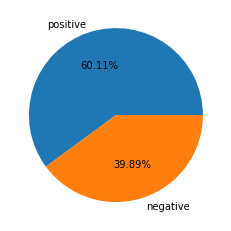

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.mlab as mlab  
import matplotlib.pyplot as plt  
labels=['positive','negative']
X=[1179936,783088]  

fig = plt.figure()
plt.pie(X,labels=labels,autopct='%1.2f%%')

plt.show()  
plt.savefig("PieChart.jpg")

In [10]:
comment

bookName
0                 动物农场
1                 洗牌年代
2                代码的未来
3                黑客与画家
4                   繁花
...                ...
448449  中国历代诗话词话选粹（上下）
448450       物联网与传感器技术
448451          丁文江的传记
448452          史记故事精粹
448453            我很重要

[448396 rows x 1 columns]

In [12]:
# make an back-up copy, if we use sample data

#comment = pd.DataFrame(Review.values,columns=Review.columns)
#comment

In [ ]:
# remove the number, punctuation

def preprocess(sentence):
    sentence=str(sentence)
    #sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    #filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in tokens]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(tokens)

comment['bookComment'] = comment['bookComment'].apply(preprocess)
comment.head()

In [8]:
# we choose some moive frequent words as the add words to avoid wrong tokenization

import jieba
# add_words = pd.read_excel("add_words.xlsx")

# for w in add_words.word:
#    jieba.add_word(w , freq=1000)
comment = data

In [9]:
%%time
# use jieba to make tokenization, 

comment_s = []
for line in comment['bookComment']:
    comment_cut = jieba.lcut(line)
    comment_s.append(comment_cut)

Wall time: 8min 54s


In [33]:
vocabDict1 = {}
vocabDict = {}
count = 1
with open("../yangqf/Desktop/DataSet/vocab.txt",'r',encoding="utf-8") as f:
    for i in range(560563):
        temp = f.readline()[:-1]
        vocabDict[temp] = count
        vocabDict1[count] = temp
        count += 1


In [34]:
vocabDict1[560563]

'獨運'

In [42]:
dictUser = {}
count = 1
userNum = len(open("../yangqf/Desktop/DataSet/userid.txt",'r').readlines())
with open("../yangqf/Desktop/DataSet/userid.txt",'r',encoding="utf-8") as f:
    for i in range(userNum):
        dictUser[f.readline()[:-1]] = count
        count += 1

In [43]:
dictBook = {}
count = 1
bookNum = len(open("../yangqf/Desktop/DataSet/related_book.txt",'r').readlines())
with open("../yangqf/Desktop/DataSet/related_book.txt",'r',encoding="utf-8") as f:
    for i in range(userNum):
        dictBook[f.readline()[:-1]] = count
        count += 1

In [44]:
dictBook

{'https://book.douban.com/subject/26728835/': 1,
 'https://book.douban.com/subject/35458441/': 2,
 'https://book.douban.com/subject/24536403/': 3,
 'https://book.douban.com/subject/6021440/': 4,
 'https://book.douban.com/subject/22714154/': 5,
 'https://book.douban.com/subject/1925375/': 6,
 'https://book.douban.com/subject/10798193/': 7,
 'https://book.douban.com/subject/1037602/': 8,
 'https://book.douban.com/subject/1029971/': 9,
 'https://book.douban.com/subject/30752237/': 10,
 'https://book.douban.com/subject/26849305/': 11,
 'https://book.douban.com/subject/20508889/': 12,
 'https://book.douban.com/subject/10432347/': 13,
 'https://book.douban.com/subject/27028517/': 14,
 'https://book.douban.com/subject/3136924/': 15,
 'https://book.douban.com/subject/30293851/': 16,
 'https://book.douban.com/subject/25863515/': 17,
 'https://book.douban.com/subject/35331904/': 18,
 'https://book.douban.com/subject/35331901/': 19,
 'https://book.douban.com/subject/35331900/': 20,
 'https://book

In [63]:
noNanComment = comment.loc[comment['bookComment'] != 'nan']

In [66]:
noNanComment['readBookUrl'][0]

'https://book.douban.com/subject/26728835/'

In [93]:
noNanComment = noNanComment.reset_index()

In [97]:
bookCountDict = {}
for i in dictBook:
    bookCountDict[i] = 0

In [99]:
bookCountDict

{'https://book.douban.com/subject/26728835/': 40,
 'https://book.douban.com/subject/35458441/': 7,
 'https://book.douban.com/subject/24536403/': 10,
 'https://book.douban.com/subject/6021440/': 327,
 'https://book.douban.com/subject/22714154/': 653,
 'https://book.douban.com/subject/1925375/': 5,
 'https://book.douban.com/subject/10798193/': 2,
 'https://book.douban.com/subject/1037602/': 189,
 'https://book.douban.com/subject/1029971/': 3,
 'https://book.douban.com/subject/30752237/': 1,
 'https://book.douban.com/subject/26849305/': 44,
 'https://book.douban.com/subject/20508889/': 15,
 'https://book.douban.com/subject/10432347/': 8,
 'https://book.douban.com/subject/27028517/': 12,
 'https://book.douban.com/subject/3136924/': 3,
 'https://book.douban.com/subject/30293851/': 1,
 'https://book.douban.com/subject/25863515/': 36,
 'https://book.douban.com/subject/35331904/': 0,
 'https://book.douban.com/subject/35331901/': 0,
 'https://book.douban.com/subject/35331900/': 0,
 'https://boo

In [98]:

for i in range(len(noNanComment)):
    if noNanComment['readBookUrl'][i] in dictBook:
        bookCountDict[noNanComment['readBookUrl'][i]] += 1
#     print(i)

In [100]:
for i in range(len(noNanComment)):
    if noNanComment['readBookUrl'][i] not in dictBook:
        comment.drop(i)
#     print(i)

KeyError: '[18701] not found in axis'

In [ ]:
comment

In [62]:
comment['bookComment'][1]

'nan'

In [59]:
noNanComment

Empty DataFrame
Columns: [id, userID, readBookUrl, bookName, bookComment, readDate, rating]
Index: []

In [10]:
comment_s

[['搞',
  '什么',
  '嘛',
  ' ',
  '极度',
  '重合',
  ' ',
  '把',
  '名字',
  '换',
  '一换',
  ' ',
  '就是',
  '历史',
  '纪实',
  '了'],
 ['nan'],
 ['Ruby',
  '的',
  '作者',
  ' ',
  '松本',
  '行弘',
  '的',
  '文集',
  ' ',
  '书中',
  '有',
  '很多',
  'Ruby',
  '写',
  '的',
  '代码段',
  ' ',
  '由于',
  '不',
  '懂',
  'Ruby',
  '的',
  '语法',
  ' ',
  '故',
  '无法',
  '实践',
  ' ',
  '是',
  '一个',
  '憾事',
  ' ',
  '这',
  '里面',
  '的',
  '文章',
  '差不多',
  '都',
  '是',
  '十年',
  '前',
  '的',
  ' ',
  '现在',
  '正好',
  '可以',
  '印证',
  '着',
  '来看',
  ' ',
  '有',
  '个别',
  '章节',
  '似乎',
  '有点',
  '错乱',
  ' ',
  '应该',
  '是',
  '我',
  '读',
  '的',
  '版本',
  '的',
  '问题',
  ' ',
  '书中',
  '很多',
  '内容',
  '还是',
  '相当',
  '硬核',
  '的'],
 ['看',
  '了',
  ' ',
  '之后',
  '渐入佳境',
  ' ',
  '最后',
  '多少',
  '还是',
  '洒',
  '了',
  '几滴',
  '泪',
  '的',
  ' ',
  '有',
  '一点',
  ' ',
  '书中',
  '一',
  '共用',
  '了',
  '个',
  ' ',
  '不响',
  ' ',
  '提取',
  'epub',
  '中',
  '的',
  '文本',
  '之后',
  '搜索',
  '所得',
  ' ',
  '维基百科',
  '上面',
  '说',
  '有',
  '约',
  '个',

In [11]:
# delete some meaningless stop words

def get_custom_stopwords(stop_words_file):    
    with open(stop_words_file,encoding = 'utf-8') as f:        
        stopwords = f.read()    
        stopwords_list = stopwords.split('\n')    
        custom_stopwords_list = [i for i in stopwords_list]    
    return custom_stopwords_list

In [12]:
#-*- coding : utf-8-*-
# coding:unicode_escape
io = "ChineseStopWords.txt"
#data=pd.read_csv(io,encoding='unicode_escape')
name = ['停用词']
stopwords = pd.read_csv(io,encoding='utf-8',engine='python',error_bad_lines=False,delim_whitespace=True,header=None,names=name)

In [13]:
stopwords

停用词
0      "
1      #
2      $
3      &
4      '
...   ..
1465   ｝
1466  ｝＞
1467   ～
1468  ～±
1469  ～＋

[1470 rows x 1 columns]

In [14]:
stop_words_file = "ChineseStopWords.txt"
stopwords = get_custom_stopwords(stop_words_file)

In [15]:
%%time
comment_clean = []
for line in comment_s:
    line_clean = []
    for word in line:
        if word not in stopwords:
            line_clean.append(word)
    comment_clean.append(line_clean)

Wall time: 13min 37s


In [16]:
comment_clean

[['搞', ' ', '重合', ' ', '名字', '换', '一换', ' ', '历史', '纪实'],
 ['nan'],
 ['Ruby',
  '作者',
  ' ',
  '松本',
  '行弘',
  '文集',
  ' ',
  '书中',
  'Ruby',
  '写',
  '代码段',
  ' ',
  '懂',
  'Ruby',
  '语法',
  ' ',
  '无法',
  '实践',
  ' ',
  '憾事',
  ' ',
  '里面',
  '文章',
  '十年',
  '前',
  ' ',
  '现在',
  '正好',
  '印证',
  ' ',
  '章节',
  '似乎',
  '有点',
  '错乱',
  ' ',
  '应该',
  '读',
  '版本',
  '问题',
  ' ',
  '书中',
  '内容',
  '相当',
  '硬核'],
 [' ',
  '之后',
  '渐入佳境',
  ' ',
  '洒',
  '几滴',
  '泪',
  ' ',
  '一点',
  ' ',
  '书中',
  '共用',
  ' ',
  '不响',
  ' ',
  '提取',
  'epub',
  '中',
  '文本',
  '之后',
  '搜索',
  '所得',
  ' ',
  '维基百科',
  '上面',
  '说',
  '约',
  ' ',
  '不响',
  ' ',
  ' ',
  '说',
  '繁花',
  ' ',
  '妖花',
  ' ',
  '魑魅',
  '争光',
  ' ',
  '魍魉',
  '见笑',
  ' ',
  '金宇',
  '澄',
  '老师',
  '文学',
  '功底',
  ' ',
  '深不可测'],
 ['文风', '可爱'],
 ['老师',
  '推荐',
  ' ',
  '明白',
  ' ',
  '主要',
  '明白',
  ' ',
  '里面',
  '内容',
  '讲',
  '语言',
  '书',
  '里面',
  '附带',
  'UML',
  '知识'],
 ['忍不住', ' ', '一口气', '完'],
 ['有趣',
  '之极',
  ' ',
  '书中',
 

In [17]:
%%time

# drop the duplicated words in one comment

comment_clean_dist = []
for line in comment_clean:   
    line_dist = []
    for word in line:
        if word not in line_dist:
            line_dist.append(word)
    comment_clean_dist.append(line_dist)

Wall time: 24.5 s


In [46]:
comment_clean_dist

[['搞', ' ', '重合', '名字', '换', '一换', '历史', '纪实'],
 ['nan'],
 ['Ruby',
  '作者',
  ' ',
  '松本',
  '行弘',
  '文集',
  '书中',
  '写',
  '代码段',
  '懂',
  '语法',
  '无法',
  '实践',
  '憾事',
  '里面',
  '文章',
  '十年',
  '前',
  '现在',
  '正好',
  '印证',
  '章节',
  '似乎',
  '有点',
  '错乱',
  '应该',
  '读',
  '版本',
  '问题',
  '内容',
  '相当',
  '硬核'],
 [' ',
  '之后',
  '渐入佳境',
  '洒',
  '几滴',
  '泪',
  '一点',
  '书中',
  '共用',
  '不响',
  '提取',
  'epub',
  '中',
  '文本',
  '搜索',
  '所得',
  '维基百科',
  '上面',
  '说',
  '约',
  '繁花',
  '妖花',
  '魑魅',
  '争光',
  '魍魉',
  '见笑',
  '金宇',
  '澄',
  '老师',
  '文学',
  '功底',
  '深不可测'],
 ['文风', '可爱'],
 ['老师', '推荐', ' ', '明白', '主要', '里面', '内容', '讲', '语言', '书', '附带', 'UML', '知识'],
 ['忍不住', ' ', '一口气', '完'],
 ['有趣', '之极', ' ', '书中', '笑话', '似乎', '全是', '冷笑', '话', '小丁', '漫画', '自然', '极好'],
 ['标记',
  '一下',
  ' ',
  '打差评',
  '好家伙',
  '时间',
  '仓促',
  '编书',
  '害搁',
  '祸害',
  '学生',
  '定理',
  '表述',
  '不清',
  '数学',
  '符号',
  '说明',
  '相关',
  '证明',
  '细节',
  '到位',
  '有人',
  '想',
  '说',
  '摆',
  '证据',
  '我会',
  '贴',
  '书评',


In [19]:
%%time

# calculate the the length of each review
len_line = []
for line in comment_clean_dist:
    length = len(line)
    len_line.append(length)

Wall time: 772 ms


In [18]:
# put all reviews in one list 

allwords_clean_dist = []
for line in comment_clean_dist:
    for word in line:
        allwords_clean_dist.append(word)

In [24]:
def judge_pure_english(keyword):
    """
    @param keyword: 需要判断是否为纯英文的字符串
    @return:
    all()函数：用于判断给定的可迭代参数 iterable 中的所有元素是否都为 TRUE：如果是返回 True，否则返回 False。
    ord()函数以一个字符（长度为1的字符串）作为参数，返回对应的 ASCII 数值: 英文的ASCII码数值小于128
    """
    return all(ord(i) < 128 for i in keyword)

In [27]:
wordList = []
for ci in listword:
    if not judge_pure_english(ci):
        wordList.append(ci)

In [31]:
data = pd.Series(data=wordList)

In [32]:
data.to_csv('../yangqf/Desktop/DataSet/vocab.txt',sep='\n',index=False,header=0)

In [49]:
allwords_clean_dist

['搞',
 ' ',
 '重合',
 '名字',
 '换',
 '一换',
 '历史',
 '纪实',
 'nan',
 'Ruby',
 '作者',
 ' ',
 '松本',
 '行弘',
 '文集',
 '书中',
 '写',
 '代码段',
 '懂',
 '语法',
 '无法',
 '实践',
 '憾事',
 '里面',
 '文章',
 '十年',
 '前',
 '现在',
 '正好',
 '印证',
 '章节',
 '似乎',
 '有点',
 '错乱',
 '应该',
 '读',
 '版本',
 '问题',
 '内容',
 '相当',
 '硬核',
 ' ',
 '之后',
 '渐入佳境',
 '洒',
 '几滴',
 '泪',
 '一点',
 '书中',
 '共用',
 '不响',
 '提取',
 'epub',
 '中',
 '文本',
 '搜索',
 '所得',
 '维基百科',
 '上面',
 '说',
 '约',
 '繁花',
 '妖花',
 '魑魅',
 '争光',
 '魍魉',
 '见笑',
 '金宇',
 '澄',
 '老师',
 '文学',
 '功底',
 '深不可测',
 '文风',
 '可爱',
 '老师',
 '推荐',
 ' ',
 '明白',
 '主要',
 '里面',
 '内容',
 '讲',
 '语言',
 '书',
 '附带',
 'UML',
 '知识',
 '忍不住',
 ' ',
 '一口气',
 '完',
 '有趣',
 '之极',
 ' ',
 '书中',
 '笑话',
 '似乎',
 '全是',
 '冷笑',
 '话',
 '小丁',
 '漫画',
 '自然',
 '极好',
 '标记',
 '一下',
 ' ',
 '打差评',
 '好家伙',
 '时间',
 '仓促',
 '编书',
 '害搁',
 '祸害',
 '学生',
 '定理',
 '表述',
 '不清',
 '数学',
 '符号',
 '说明',
 '相关',
 '证明',
 '细节',
 '到位',
 '有人',
 '想',
 '说',
 '摆',
 '证据',
 '我会',
 '贴',
 '书评',
 '里',
 '公开',
 '处刑',
 '拿来',
 '教材',
 '好好',
 '学学',
 '李红',
 '教授',
 '态度',
 '理

In [21]:
# make a dataframe to count the frequency

df_allwords_clean_dist = pd.DataFrame({'allwords': allwords_clean_dist})
word_count = df_allwords_clean_dist.allwords.value_counts().reset_index()    
word_count.columns = ['word','count'] 

In [51]:
word_count

word    count
0        nan  1072505
1              815769
2         本书    77694
3         喜欢    76685
4         故事    73864
...      ...      ...
486391    郝萌        1
486392  盘山公路        1
486393    男虫        1
486394    用熊        1
486395   决鬥火        1

[486396 rows x 2 columns]

In [22]:
word_count = word_count.iloc[2:]

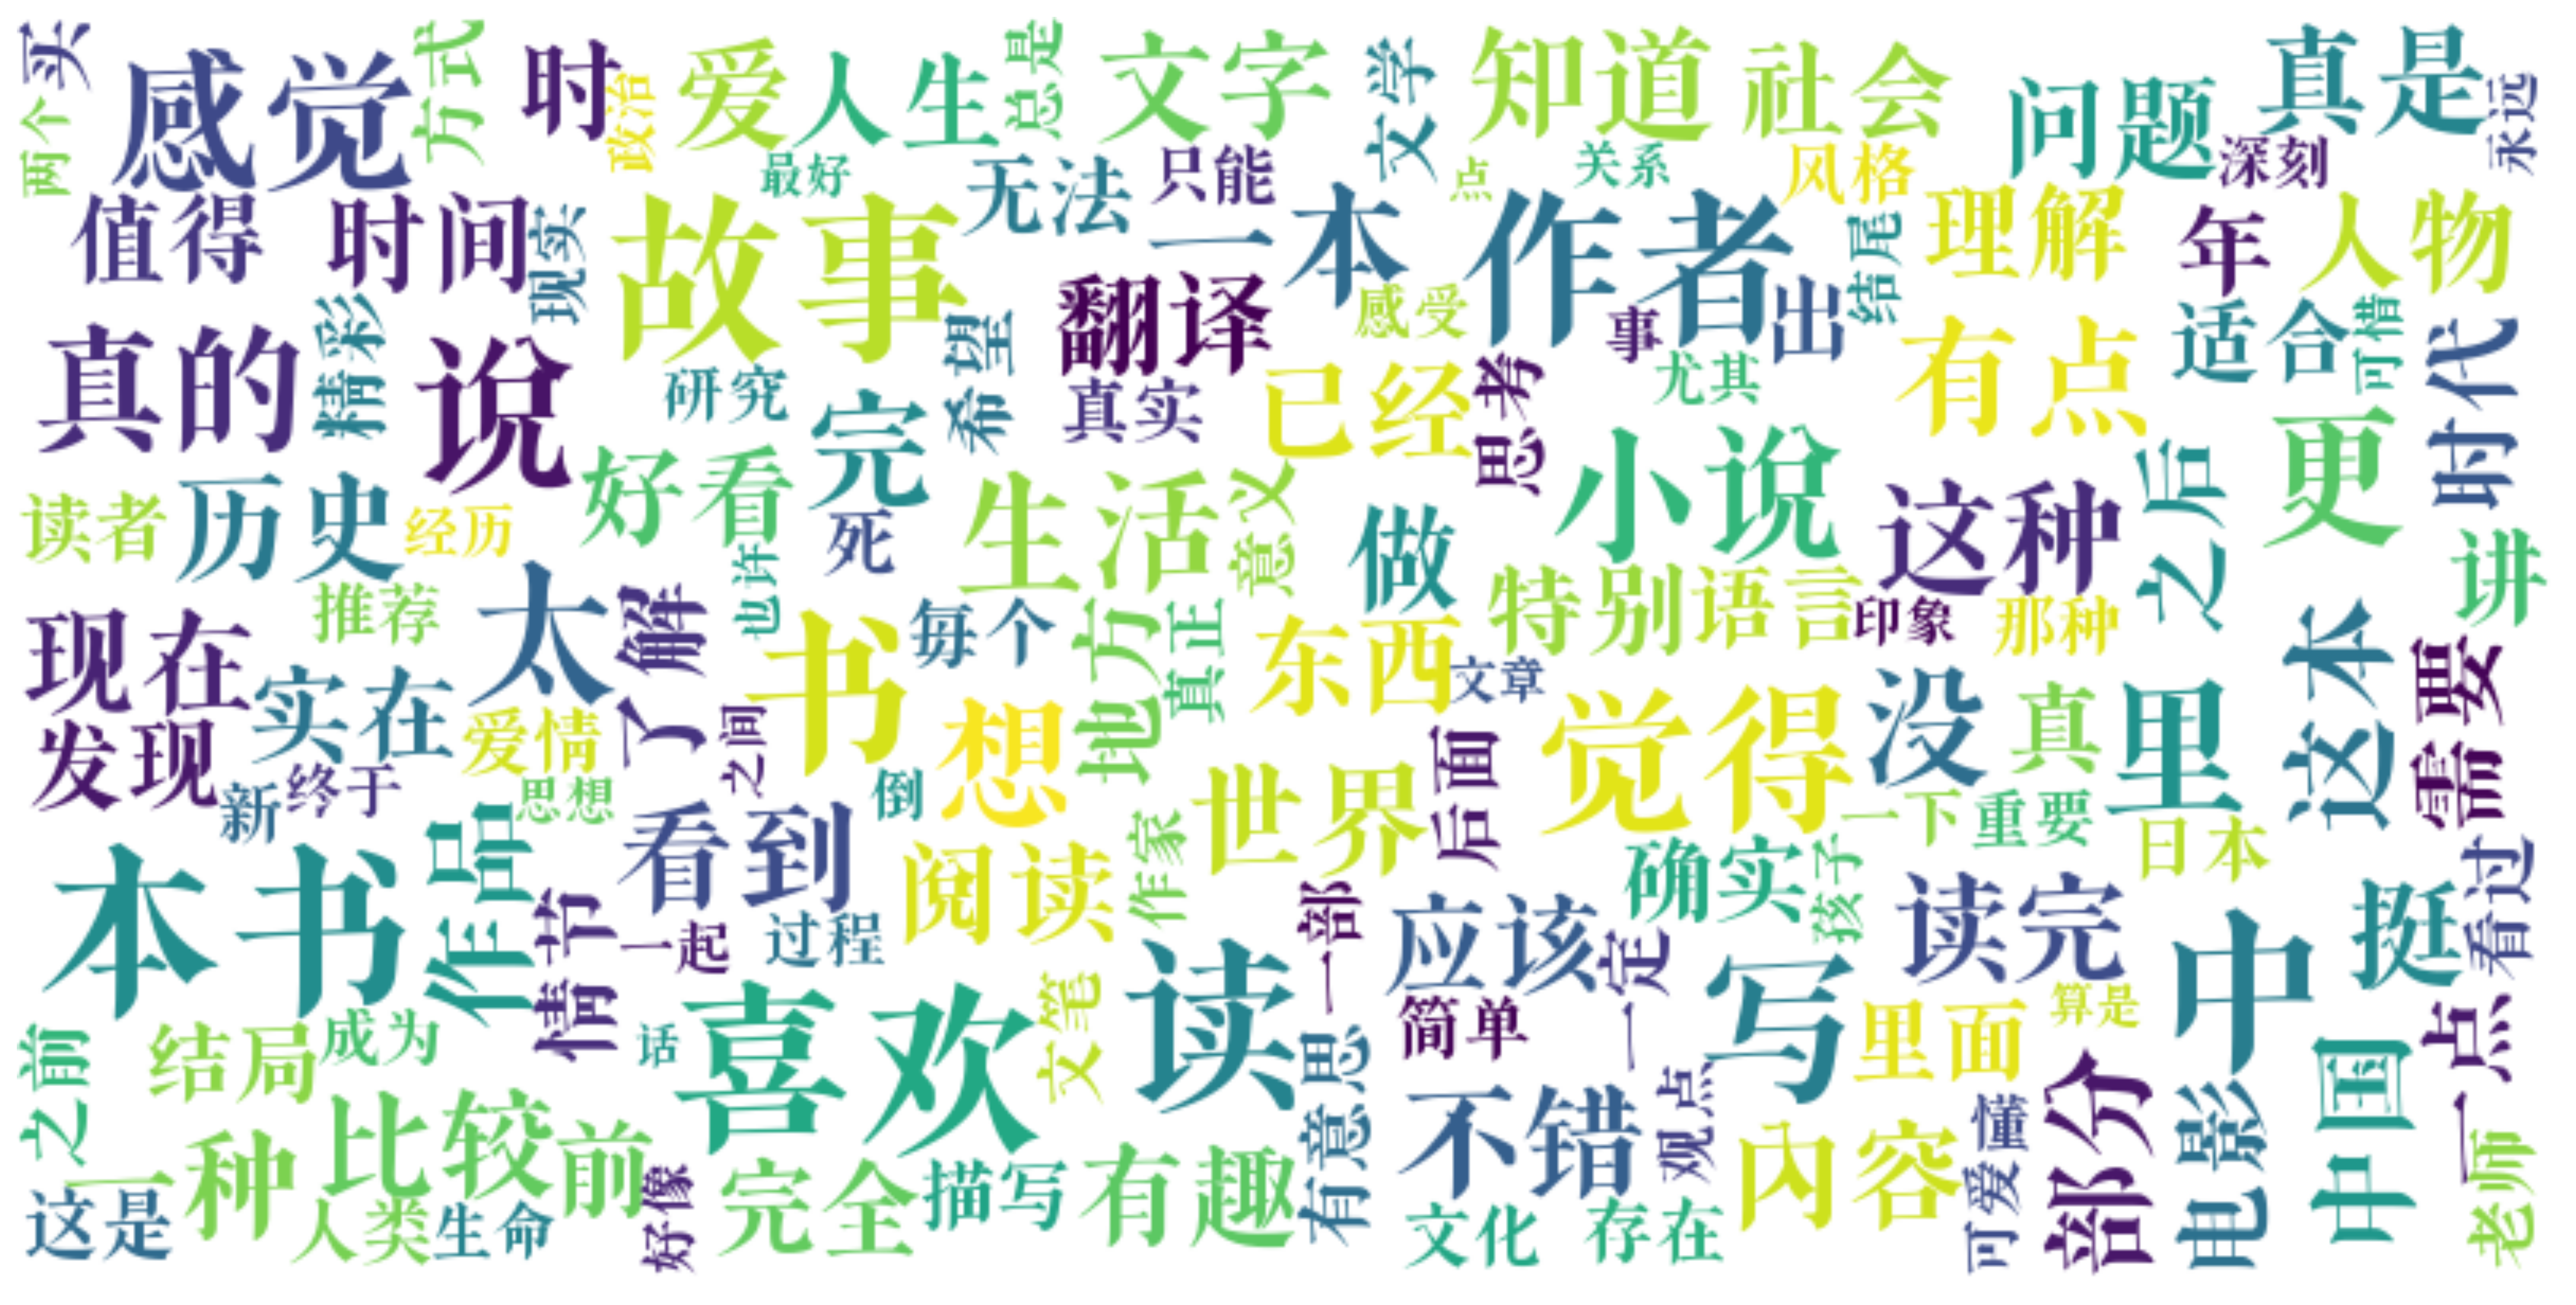

In [23]:
# use the most frequent words to draw word cloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt
    
plt.figure(figsize=(20,10), dpi = 300)
w_c = WordCloud(font_path=r"ZiXinFangMingKeBen(GuJiBan)-2.ttf",background_color="white", 
                max_font_size=60, margin=1,width=800, height=400)
wc = w_c.fit_words({x[0]:x[1] for x in word_count.head(150).values})    

plt.imshow(wc, interpolation='bilinear') 
plt.axis("off")
plt.show()

In [26]:
# transform comment_clean_dist to only one list that using commas fragments each comment

All_text = []
# for line in comment_clean_dist:
for line in comment_clean:
    onetext = " ".join(line)
    All_text.append(onetext)
All_text

['搞   重合   名字 换 一换   历史 纪实',
 'nan',
 'Ruby 作者   松本 行弘 文集   书中 Ruby 写 代码段   懂 Ruby 语法   无法 实践   憾事   里面 文章 十年 前   现在 正好 印证   章节 似乎 有点 错乱   应该 读 版本 问题   书中 内容 相当 硬核',
 '  之后 渐入佳境   洒 几滴 泪   一点   书中 共用   不响   提取 epub 中 文本 之后 搜索 所得   维基百科 上面 说 约   不响     说 繁花   妖花   魑魅 争光   魍魉 见笑   金宇 澄 老师 文学 功底   深不可测',
 '文风 可爱',
 '老师 推荐   明白   主要 明白   里面 内容 讲 语言 书 里面 附带 UML 知识',
 '忍不住   一口气 完',
 '有趣 之极   书中 笑话 似乎 全是 冷笑 话   小丁 漫画   自然 极好',
 '标记 一下   打差评   好家伙   时间 仓促 编书   害搁 祸害 学生   定理 表述 不清   数学 符号 说明   相关 证明 细节 到位   有人 想 说 摆 证据   我会 证据 贴 书评 里   公开 处刑   拿来 教材   好好 学学 李红 教授 编书 态度   理解 东西 硬是 给整 懵   书后 习题     是从 习题集 里面 粘 过来   今天 化身 喷子   喷一 喷 sh ǎ b ī 教材',
 '不胜唏嘘',
 '可谓 临终 之前 肺腑之言 语   中 详情   一页 逃脱 当今 关键字 审查',
 'KMP 像是 梦里 写   赔 时间 赔 精神损失   纠结 细节 噩梦   写书 严谨   好好 找人 校对 校对   以讹传讹 捧 神坛 书   下来   不配',
 '好书   目前 彻底 理解 内容 不到   以后 应该 读',
 '  童年 真的 感动   现在 人心 微变',
 'git 安排 代码   不想 真的 动手 敲',
 '确实 中规中矩   有点像 API 文档   最大 收获 知道 Jupyternotebook   好用',
 '前期   后期 名词 太   讲解 比较 浅显   太 懂',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan'

In [27]:
# using All_text value make a dataframe

df_all_text = pd.DataFrame(All_text, columns = ['Comment'])
df_all_text

Comment
0                                 搞   重合   名字 换 一换   历史 纪实
1                                                      nan
2        Ruby 作者   松本 行弘 文集   书中 Ruby 写 代码段   懂 Ruby 语法...
3          之后 渐入佳境   洒 几滴 泪   一点   书中 共用   不响   提取 epub...
4                                                    文风 可爱
...                                                    ...
2188650  大吃一惊   真的 糊涂   一刹那   心里 觉得 一种 几十年 分离 从未有过 孤独  ...
2188651                                                nan
2188652                                                nan
2188653  正好 出差   赶路 时间   一周 完   写得 太好了   难以想象 理论 物理学家 语...
2188654                                                nan

[2188655 rows x 1 columns]

In [28]:
data['bookComment'] = All_text

In [31]:
data.to_csv("../yangqf/Desktop/DataSet/userbookcomment1.csv",index=False)

In [68]:
# spilting data to train and test data set

text = df_all_text['Comment']
score = comment['rating']
X_train1, X_test1, y_train1, y_test1 = train_test_split(text, score, test_size = 0.20, random_state = 0, stratify = score)

In [69]:
# convert corpus to BoW format

from sklearn.feature_extraction.text import CountVectorizer 
count_vect = CountVectorizer(encoding='latin-1')
X_train_counts = count_vect.fit_transform(X_train1)
X_train_counts.shape

(1750924, 416464)

In [70]:
#calculate tf-idf and use tf-idfs to represent documents

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=True)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_train_tfidf.shape

(1750924, 416464)

## 2.Using ti-idfs as independent variables to predict the sentiment

We first tried to build lda and lsa topic models to make prediction(the same as project 3 method), but the result is not ideal. No mather we used either model, the probability of prediction is around the random guess's probability. Therefore, we move our direction to using ti-idfs as dependent variables to build our model after refering to other nlp sentiment prediction projects. We uses several classification models, then print out their classification report and draw ROC plot. We choose the best model according to both the f1-score and AUC score.

### Multinomial NB

In [71]:
# build MultinomialNB model

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, y_train1)

In [72]:
# fit MultinomialNB model

from sklearn.metrics import accuracy_score, confusion_matrix
X_test_counts = count_vect.transform(X_test1)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
y_pre1 = clf.predict(X_test_tfidf)
gaussian_acc = accuracy_score(y_test1, y_pre1)
print(gaussian_acc)

0.7364705721093548


In [73]:
# print the classification report and confustion report

print("Classification Report:\n ", classification_report(y_test1, y_pre1))
print("Confusion Matrix:\n ", confusion_matrix(y_test1, y_pre1))

Classification Report:
                precision    recall  f1-score   support

           0       0.79      0.09      0.16    123439
           1       0.73      0.99      0.84    314292

    accuracy                           0.74    437731
   macro avg       0.76      0.54      0.50    437731
weighted avg       0.75      0.74      0.65    437731

Confusion Matrix:
  [[ 10907 112532]
 [  2823 311469]]


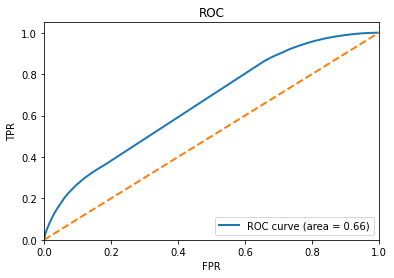

In [74]:
# draw the ROC plot and calculate AUC score

from sklearn.metrics import auc
from sklearn.metrics import roc_curve

y_pred11 = clf.predict_proba(X_test_tfidf)
(fpr, tpr, thresholds) = roc_curve(y_test1,y_pred11[:,1],pos_label='1')
roc_auc = auc(fpr,tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr,lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

### Logistic Regression

In [75]:
# cross-validation to find the best parameter

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

random_search = {'C':[0.01, 1, 10, 100]}
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=random_search, cv=4, n_jobs=-1, scoring='roc_auc')
grid_result=grid_search.fit(X_train_tfidf, y_train1)
print(f'Best:{grid_result.best_score_}using{grid_result.best_params_}','\n')

Best:0.6699767776588996using{'C': 1} 



In [76]:
lr = LogisticRegression(C=1)
lr.fit(X_train_tfidf, y_train1)
y_pre2 = lr.predict(X_test_tfidf)
logistic_acc = accuracy_score(y_test1, y_pre2)
print(logistic_acc)

0.7485236366626993


In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [78]:
print("Classification Report:\n ", classification_report(y_test1, y_pre2))
print("Confusion Matrix:\n ", confusion_matrix(y_test1, y_pre2))

Classification Report:
                precision    recall  f1-score   support

           0       0.69      0.20      0.31    123439
           1       0.75      0.96      0.85    314292

    accuracy                           0.75    437731
   macro avg       0.72      0.58      0.58    437731
weighted avg       0.73      0.75      0.69    437731

Confusion Matrix:
  [[ 24683  98756]
 [ 11323 302969]]


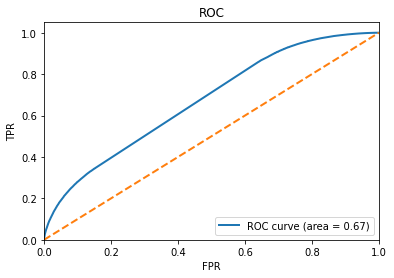

In [79]:
y_pred11 = lr.predict_proba(X_test_tfidf)
(fpr, tpr, thresholds) = roc_curve(y_test1,y_pred11[:,1],pos_label='1')
roc_auc = auc(fpr,tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr,lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

### Linear SVM

In [80]:
svm = LinearSVC()
svm.fit(X_train_tfidf, y_train1)
y_pred4 = svm.predict(X_test_tfidf)

print("Classification Report:\n ", classification_report(y_test1, y_pred4))
print("Confusion Matrix:\n ", confusion_matrix(y_test1, y_pred4))

Classification Report:
                precision    recall  f1-score   support

           0       0.64      0.22      0.33    123439
           1       0.76      0.95      0.84    314292

    accuracy                           0.75    437731
   macro avg       0.70      0.58      0.58    437731
weighted avg       0.72      0.75      0.70    437731

Confusion Matrix:
  [[ 26859  96580]
 [ 14982 299310]]


### Perception

In [81]:
from sklearn.linear_model import Perceptron
model5=Perceptron()
model5.fit(X_train_tfidf, y_train1)
y_pred5 = model5.predict(X_test_tfidf)

print("Classification Report:\n ", classification_report(y_test1, y_pred5))
print("Confusion Matrix:\n ", confusion_matrix(y_test1, y_pred5))

Classification Report:
                precision    recall  f1-score   support

           0       0.47      0.24      0.32    123439
           1       0.75      0.89      0.81    314292

    accuracy                           0.71    437731
   macro avg       0.61      0.57      0.57    437731
weighted avg       0.67      0.71      0.68    437731

Confusion Matrix:
  [[ 29975  93464]
 [ 33914 280378]]


### MLP Classifier

In [82]:
from sklearn.neural_network import MLPClassifier
model7 = MLPClassifier(hidden_layer_sizes=(400,100),alpha=0.01,max_iter=1000) 
model7.fit(X_train_tfidf, y_train1) 
y_pred7 = model6.predict(X_test_tfidf)

print("Classification Report:\n ", classification_report(y_test1, y_pred7))

MemoryError: Unable to allocate 1.24 GiB for an array with shape (416464, 400) and data type float64

### GradientBoost

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
model6= GradientBoostingClassifier(random_state=1)             
model6.fit(X_train_tfidf, y_train1)           

GradientBoostingClassifier(random_state=1)

In [84]:
y_pred6 = model6.predict(X_test_tfidf)

print("Classification Report:\n ", classification_report(y_test1, y_pred6))
print("Confusion Matrix:\n ", confusion_matrix(y_test1, y_pred6))

Classification Report:
                precision    recall  f1-score   support

           0       0.79      0.03      0.05    123439
           1       0.72      1.00      0.84    314292

    accuracy                           0.72    437731
   macro avg       0.75      0.51      0.44    437731
weighted avg       0.74      0.72      0.62    437731

Confusion Matrix:
  [[  3158 120281]
 [   859 313433]]


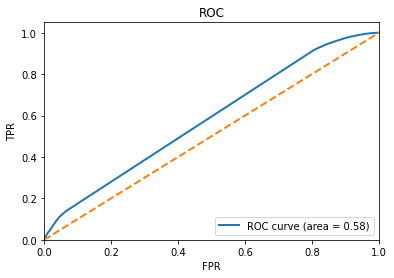

In [85]:
y_pred11 = model6.predict_proba(X_test_tfidf)
(fpr, tpr, thresholds) = roc_curve(y_test1,y_pred11[:,1],pos_label='1')
roc_auc = auc(fpr,tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr,lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

### AdaBoost

In [86]:
%%time
from sklearn.ensemble import AdaBoostClassifier
import sklearn.tree as st
import sklearn.ensemble as se
model10=AdaBoostClassifier(n_estimators=150, random_state=0)
model10.fit(X_train_tfidf, y_train1) 
y_pred10 = model10.predict(X_test_tfidf)

print("Classification Report:\n ", classification_report(y_test1, y_pred10))
print("Confusion Matrix:\n ", confusion_matrix(y_test1, y_pred10))

Classification Report:
                precision    recall  f1-score   support

           0       0.65      0.10      0.17    123439
           1       0.73      0.98      0.84    314292

    accuracy                           0.73    437731
   macro avg       0.69      0.54      0.51    437731
weighted avg       0.71      0.73      0.65    437731

Confusion Matrix:
  [[ 12324 111115]
 [  6512 307780]]
Wall time: 14min 4s


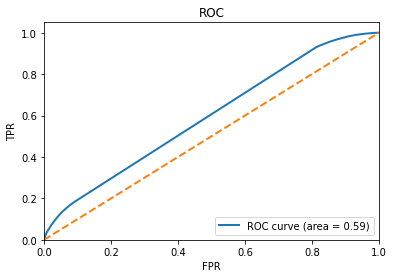

In [87]:
y_pred11 = model10.predict_proba(X_test_tfidf)
(fpr, tpr, thresholds) = roc_curve(y_test1,y_pred11[:,1],pos_label='1')
roc_auc = auc(fpr,tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr,lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

## 3.Build the LSA and LDA topic models for the reviews

We use two models LDA and LSA to handle the review documents. For each model, we use the corpus after applying tf-idf and dictionary to fit the model and get several topics. Secondly, we use coherence values to find the optimal topic number.Coherence value help distinguish between topics that are semantically interpretable topics and topics that are artifacts of statistical inference. So we use that with highest score to decide the number of topic. Then, we print the topics and the score of each topic for the reviews.

### LDA-choose the topic number
We first choose the optimal topic number.

In [88]:
from gensim import corpora, models
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [89]:
dictionary= Dictionary(comment_clean)  # fit dictionary
dictionary
corpus = [dictionary.doc2bow(line) for line in comment_clean]  # convert corpus to BoW format

In [90]:
%%time
from gensim import corpora, models
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3): #def2
    coherence_values = []
    model_list = []
    for num_of_topics in range(start, stop, step):
        # generate LDA model
        print(num_of_topics)
        model = gensim.models.ldamodel.LdaModel(doc_term_matrix, num_topics=num_of_topics, id2word = dictionary,random_state = 1)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=text, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    print(coherence_values)
    return model_list, coherence_values

def plot_graph(doc_clean,start, stop, step): #def3
    #dictionary
    model_list, coherence_values = compute_coherence_values(dictionary,corpus,text,stop, start, step) #def2
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()
    
text = comment_clean
start,stop,step=1,6,1
plot_graph(text,start,stop,step)
#print()
# We got 4 is the optimal number for the topic choosen.

1


BrokenPipeError: [Errno 32] Broken pipe

In [91]:
plt.savefig('lda_best_topics.png')

<Figure size 432x288 with 0 Axes>

### LDA-build the model

In [92]:
nt = 4
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=nt, id2word = dictionary, passes=2) 

print(lda_model.print_topics(num_topics=nt, num_words=5))

MemoryError: Unable to allocate 1.86 MiB for an array with shape (486396,) and data type float32

In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

### LSA-choose the topic number

In [ ]:
%%time
from gensim.models import LsiModel
from gensim import corpora, models
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3): #def2
    coherence_values = []
    model_list = []
    for num_of_topics in range(start, stop, step):
        # generate LSA model
        print(num_of_topics)
        model = LsiModel(doc_term_matrix, num_topics=num_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=text, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    print(coherence_values)
    return model_list, coherence_values

def plot_graph(doc_clean,start, stop, step): #def3
    #dictionary
    model_list, coherence_values = compute_coherence_values(dictionary,corpus,text,stop, start, step) #def2
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()
    
text = comment_clean
start,stop,step=1,6,1
plot_graph(text,start,stop,step)
#print()
# We got 3 is the optimal number for the topic choosen.

### LSA-build the model

In [ ]:
nt = 3
lsa_model = LsiModel(corpus, num_topics=nt, id2word = dictionary) 

print(lsa_model.print_topics(num_topics=nt, num_words=10))

In [ ]:
for idx, topic in lsa_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

## 4.Now, let's use a new film 'Frozen' to test our model!

In [62]:
dataset = pd.read_csv("冰雪奇缘 Frozen.txt", sep='\t', header=None)
dataset

FileNotFoundError: [Errno 2] No such file or directory: '冰雪奇缘 Frozen.txt'

In [63]:
dataset[0]=((dataset[0]+0.5)/3.5).astype(int)

NameError: name 'dataset' is not defined

In [64]:
def preprocess(sentence):
    sentence=str(sentence)
    #sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    #filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in tokens]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(tokens)

In [65]:
comment_s1 = []
for line in dataset[1]:
    comment_cut = jieba.lcut(line)
    comment_s1.append(comment_cut)

NameError: name 'dataset' is not defined

In [66]:
comment_clean1 = []
for line in comment_s1:
    line_clean = []
    for word in line:
        if word not in stopwords:
            line_clean.append(word)
    comment_clean1.append(line_clean)

In [67]:
comment_clean_dist1 = []
for line in comment_clean1:   
   line_dist = []
   for word in line:
      if word not in line_dist:
         line_dist.append(word)
   comment_clean_dist1.append(line_dist)

In [68]:
allwords_clean_dist1 = []
for line in comment_clean_dist1:
   for word in line:
      allwords_clean_dist1.append(word)

In [69]:
All_text1 = []
for line in comment_clean_dist1:
    onetext = " ".join(line)
    All_text1.append(onetext)

In [70]:
df_all_text1 = pd.DataFrame(All_text1, columns = ['Comment'])
df_all_text1

Empty DataFrame
Columns: [Comment]
Index: []

In [71]:
X_test_bxqy=df_all_text1.Comment
y_test_bxqy=dataset[0]

y_test_bxqy=y_test_bxqy.astype("str")

NameError: name 'dataset' is not defined

In [72]:
X_test_bxqy_counts = count_vect.transform(X_test_bxqy)
X_test_bxqy_tfidf = tfidf_transformer.transform(X_test_bxqy_counts)

NotFittedError: Vocabulary not fitted or provided

In [73]:
%%time
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train1)
y_predlr_bxqy = lr.predict(X_test_bxqy_tfidf)

print("Classification Report:\n ", classification_report(y_test_bxqy, y_predlr_bxqy))
print("\nConfusion Matrix:\n",metrics.confusion_matrix(y_test_bxqy, y_predlr_bxqy))

NameError: name 'X_train_tfidf' is not defined

In [74]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

In [75]:
y_pred11 = lr.predict_proba(X_test_bxqy_tfidf)
(fpr, tpr, thresholds) = roc_curve(y_test_bxqy,y_pred11[:,1],pos_label='1')
roc_auc = auc(fpr,tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr,lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

NameError: name 'X_test_bxqy_tfidf' is not defined

In [76]:
X_train_scaled=X_train_tfidf
X_test_scaled=X_test_bxqy_tfidf
y_test=y_test_bxqy
y_train=y_train1

from sklearn.naive_bayes import BernoulliNB
model17 = BernoulliNB()
model17.fit(X_train_scaled, y_train)
y_pred17 = model17.predict(X_test_scaled)

print("Classification Report:\n ", classification_report(y_test, y_pred17))
print("\nConfusion Matrix:\n",metrics.confusion_matrix(y_test, y_pred17))

NameError: name 'X_train_tfidf' is not defined

In [77]:
y_pred11 = model17.predict_proba(X_test_bxqy_tfidf)
(fpr, tpr, thresholds) = roc_curve(y_test_bxqy,y_pred11[:,1],pos_label='1')
roc_auc = auc(fpr,tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr,lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

NameError: name 'model17' is not defined